## Machine Learning

Let's take a step back before we get started. On the left we have traditional programming, an input goes into a function and an output is generated. 

On the right, we have machine learning. Where we have an input and an output, but we're trying to generate the function. 

![Machine Learning](imgs/Difference-between-Traditional-Programming-and-Machine-Learning-1024x538.png)

## Deep Learning: Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

![title](imgs/noise_cat.png)

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

## Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Add Noise to the Image

In [5]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
### Normalize the data
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## What kind of data did we load?

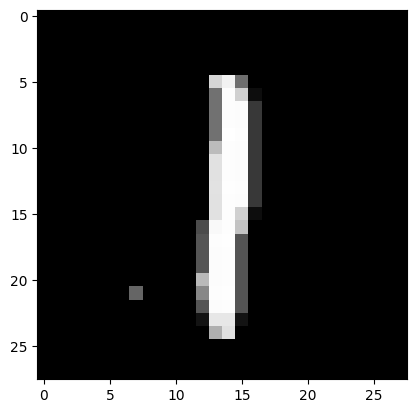

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## What is an example of the noisy sample?

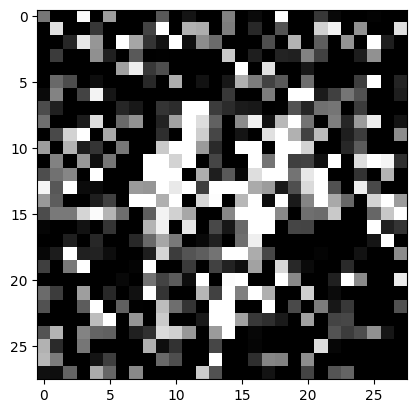

In [8]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

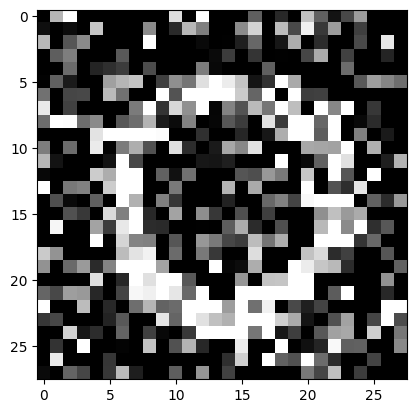

In [9]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

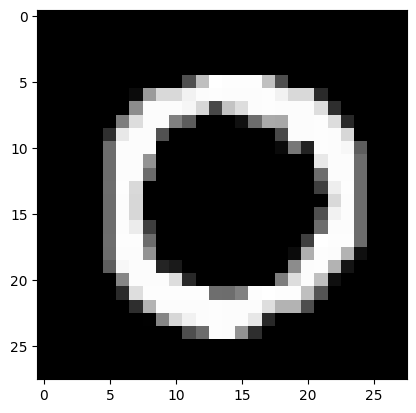

In [10]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

### Define an encoder layer

The first component, the encoder, is similar to a conventional feed-forward network. However, it's function is not predicting values, instead, it's function is to learn a compressed data structure. We can implement the encoder layer as dense layers, as follows:

### Define an decoder layer

The second component, the decoder, is also similar to a feed-forward network. However, instead of reducing data to lower dimension, it attempts to reverse the process, i.e. reconstruct the data 
 from its lower dimension representation 
 to its original dimension.

In [11]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

c:\Users\Lorin\Documents\repo\experiements\denoiseimage\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

## Sending noisy and clean data into the model to train.

We're going to have it learn the inputs and the outputs, so it can produce a 'function' 

In [12]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.3542 - val_loss: 0.1569
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1518 - val_loss: 0.1399
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1375 - val_loss: 0.1316
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1316 - val_loss: 0.1276
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1280 - val_loss: 0.1253
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1257 - val_loss: 0.1239
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1236 - val_loss: 0.1215
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1220 - val_loss: 0.1203
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1206 - val_loss: 0.1191
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1199 - val_loss: 0.1187
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1188 - val_loss: 0.1178
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

## Predict a result

In [13]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## What noisy image did we send in?

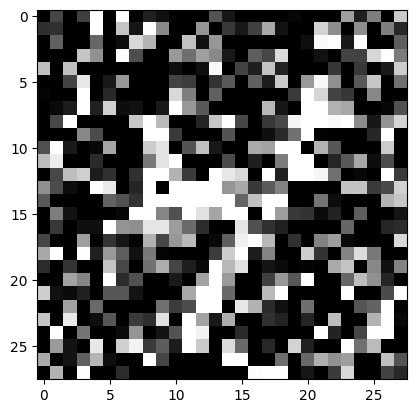

In [14]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

## What image did we predict from the above input?

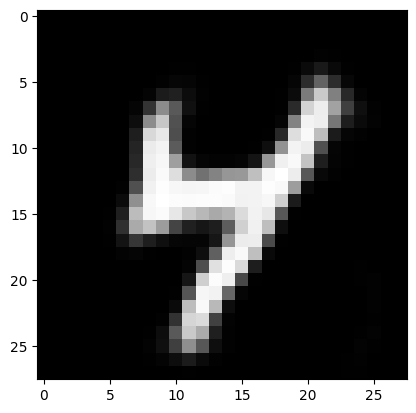

In [15]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

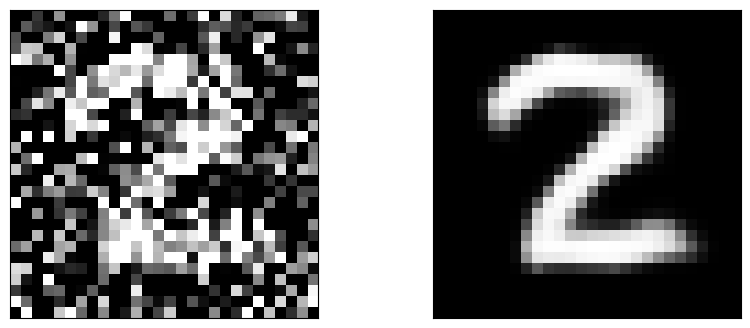

In [16]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

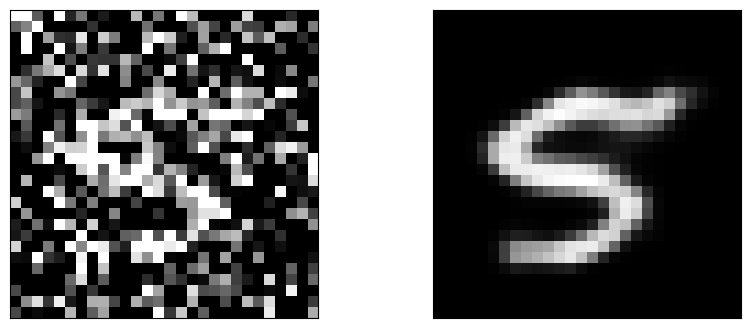

In [17]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()